<a href="https://colab.research.google.com/github/Sapphirevic/Data-Analysis/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics Assesment

## Import Libraries and Load Data

In [ ]:
!pip install -q imbalanced-learn xgboost --quiet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

import gradio as gr
import joblib
import numpy as np
import pandas as pd

In [ ]:
# Load the dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Exploratory Data Analysis (EDA)



*   Find missing or nan values

*   Get the statistics of the data

*   Get the data distributions

*   Find the correlation of the features

*   feature engineering - Encoding









In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
# statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Distribution Plots

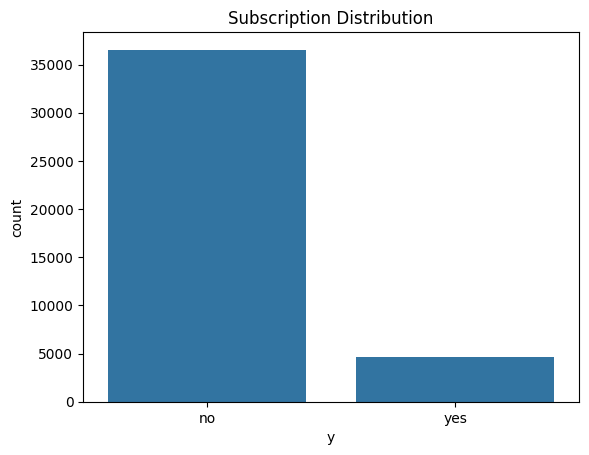

In [ ]:
# Class distribution
sns.countplot(x='y', data=df)
plt.title("Subscription Distribution")
plt.show()

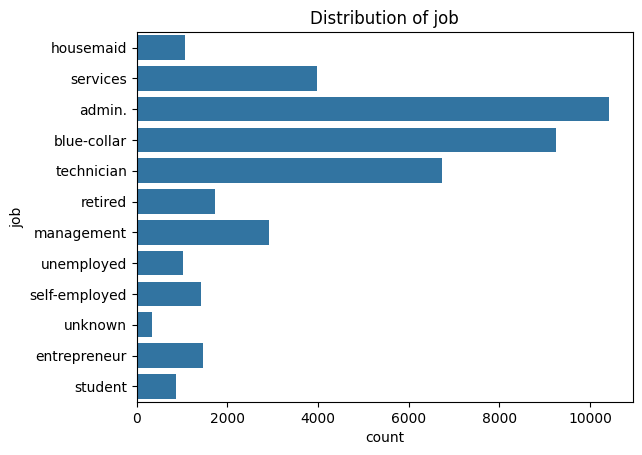

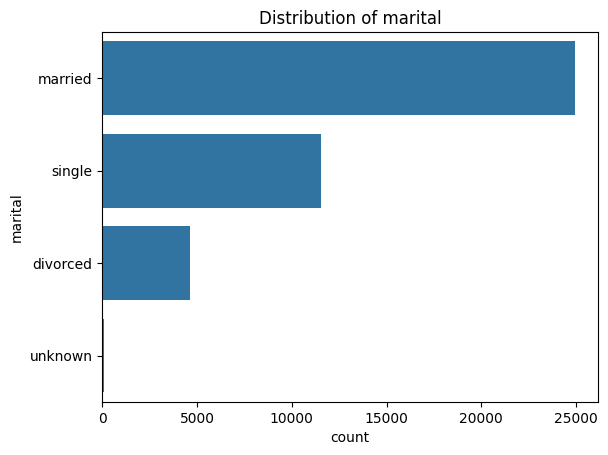

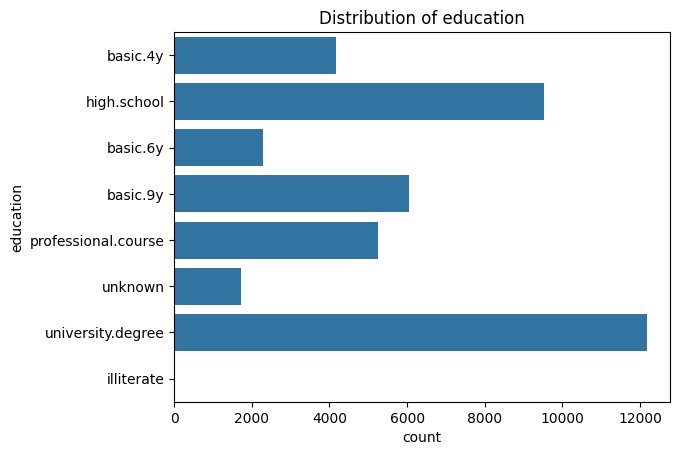

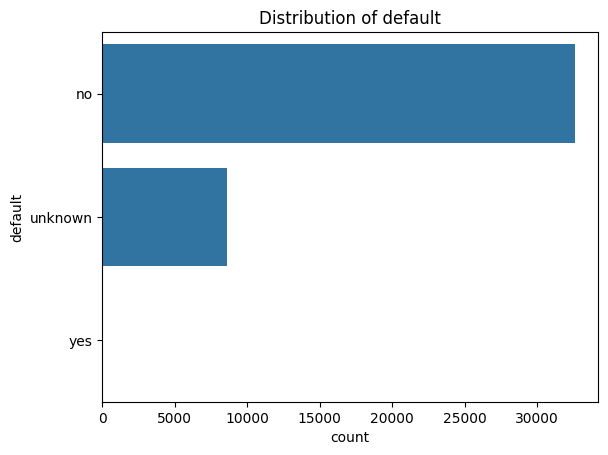

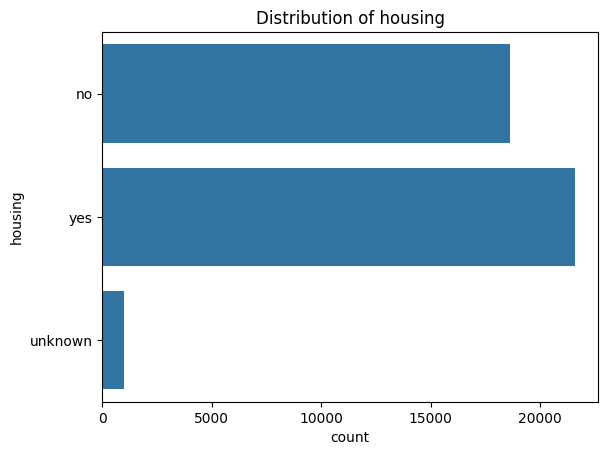

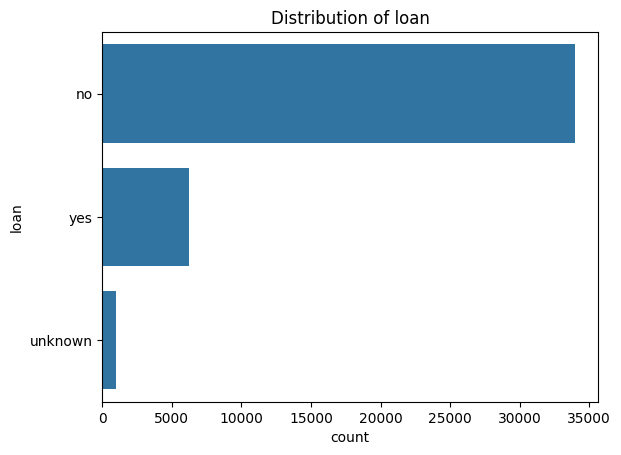

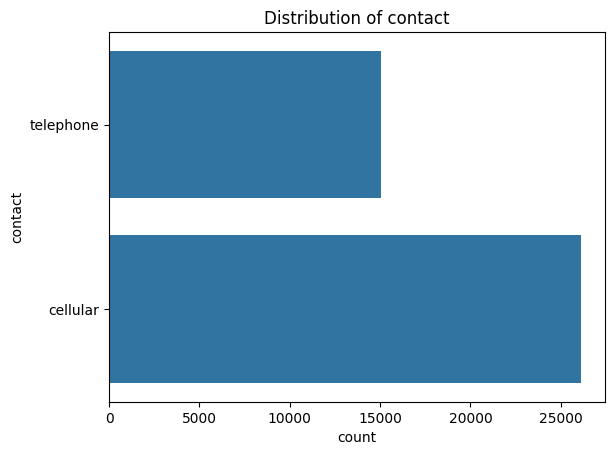

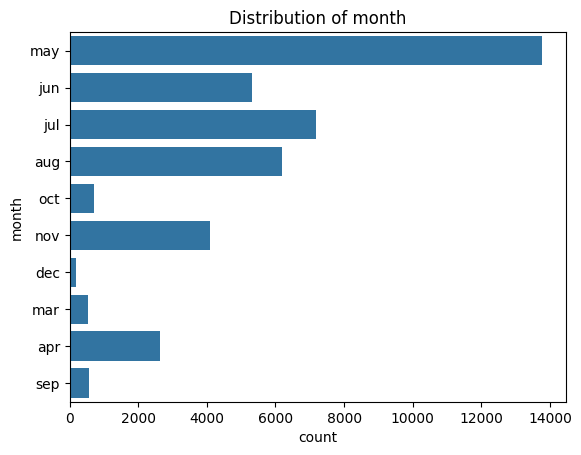

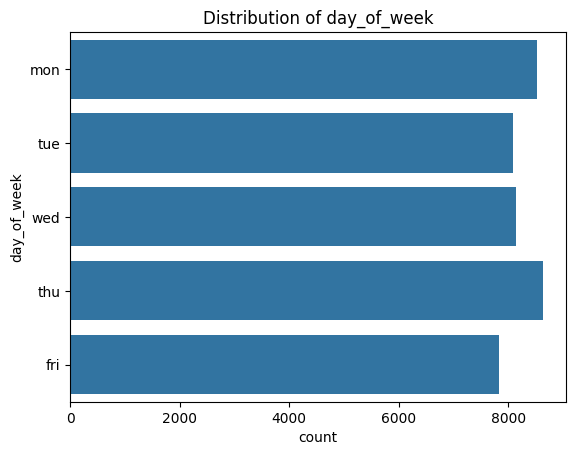

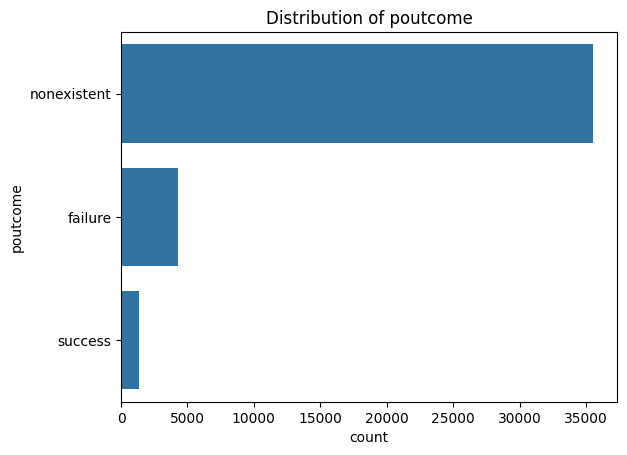

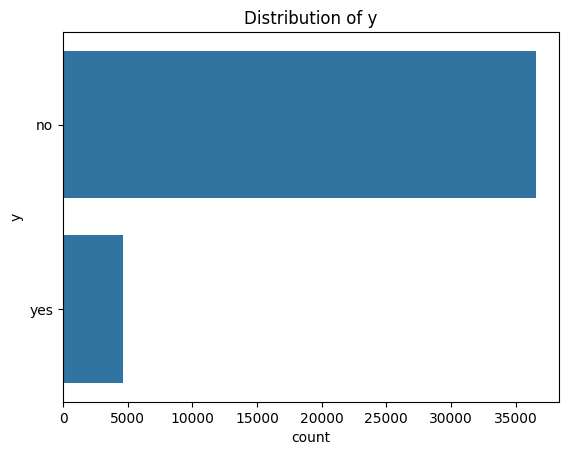

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    sns.countplot(y=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

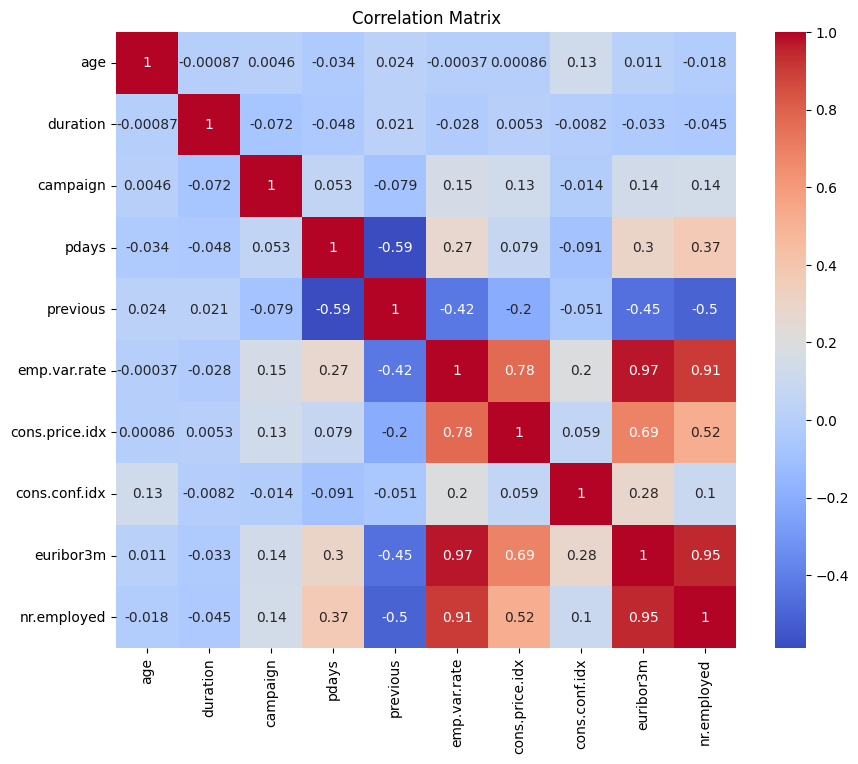

In [ ]:
# Correlation matrix for numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

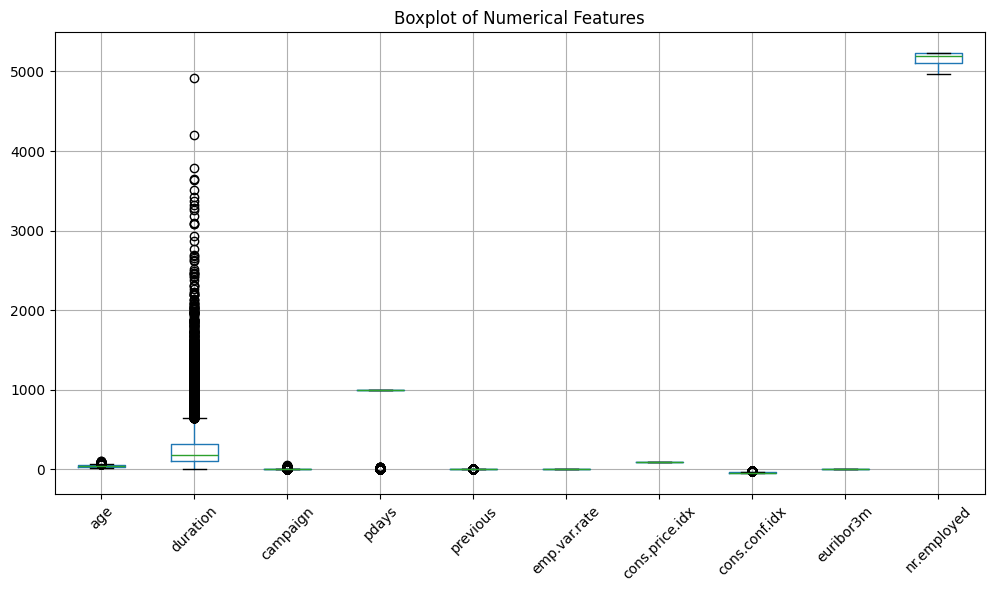

In [ ]:
# Boxplot for outliers in numerical features
plt.figure(figsize=(12,6))
df[numerical_cols].boxplot()
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

## Logistic Regression

### Feature Engineering

In [ ]:
# Convert categorical variables using Label Encoding
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

X = df.drop('y', axis=1)
y = df['y']

print(y.value_counts(normalize=True))


y
0    0.887346
1    0.112654
Name: proportion, dtype: float64


### Build and Train the Model

In [ ]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42) # Apply SMOTE to balance classes in training set
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train logistic regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train_sm)

# Predict
y_pred = model.predict(X_test_scaled)


### Model Performance

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1]))


Confusion Matrix:
 [[6408  902]
 [ 182  746]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      7310
           1       0.45      0.80      0.58       928

    accuracy                           0.87      8238
   macro avg       0.71      0.84      0.75      8238
weighted avg       0.91      0.87      0.88      8238

ROC AUC Score: 0.9203520802868059


### Feature Importance

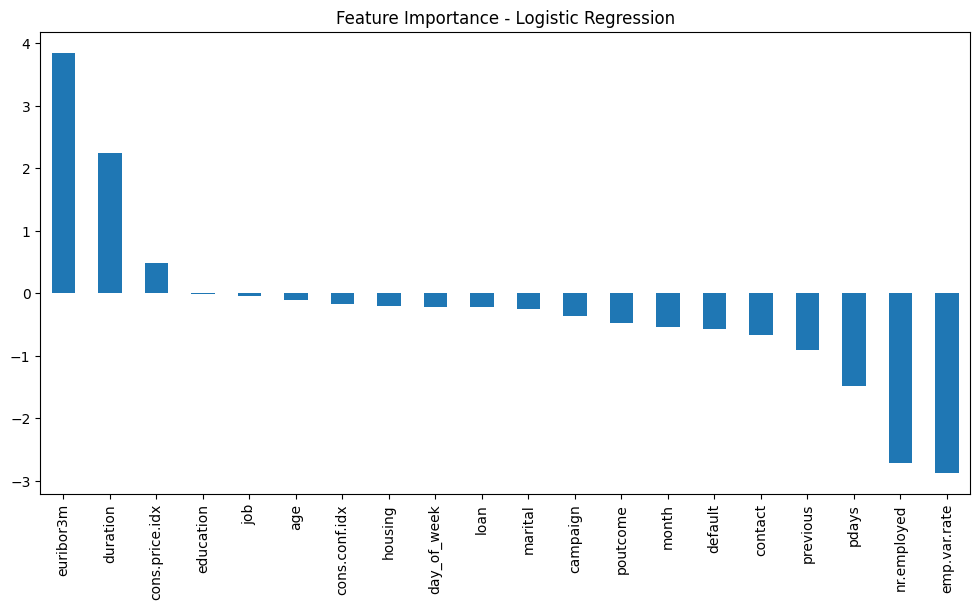

In [ ]:
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importance - Logistic Regression")
plt.show()


## Random forest

In [ ]:
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include='object'):
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

### Interaction Features

In [ ]:
df_encoded['duration_campaign_interaction'] = df_encoded['duration'] * df_encoded['campaign']

In [ ]:
df_encoded['age_bucket'] = pd.cut(df_encoded['age'],
                                   bins=[0, 30, 50, 100],
                                   labels=['young', 'middle', 'senior'])

In [ ]:
le_bucket = LabelEncoder()
df_encoded['age_bucket'] = le_bucket.fit_transform(df_encoded['age_bucket'])

### Build and Train the Model

In [ ]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Check class imbalance
print(y.value_counts(normalize=True))


y
0    0.887346
1    0.112654
Name: proportion, dtype: float64


In [ ]:
# @title Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
model_forest = RandomForestClassifier(n_estimators=100, random_state=42)
model_forest.fit(X_train, y_train)

# Predictions
y_pred = model_forest.predict(X_test)


### Model Performance

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7332
           1       0.94      0.96      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



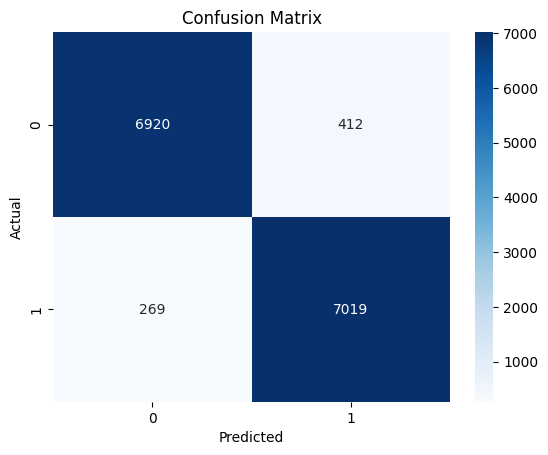

ROC-AUC Score: 0.993


In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC-AUC Score
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.3f}")


### Feature Importance

                          Feature  Importance
10                       duration    0.238769
18                      euribor3m    0.105725
20  duration_campaign_interaction    0.105008
19                    nr.employed    0.086665
17                  cons.conf.idx    0.067594
15                   emp.var.rate    0.061384
16                 cons.price.idx    0.051739
7                         contact    0.038603
8                           month    0.030499
0                             age    0.026915
4                         default    0.022191
1                             job    0.021349
3                       education    0.020794
11                       campaign    0.020784
9                     day_of_week    0.017618
5                         housing    0.016557
12                          pdays    0.016456
14                       poutcome    0.013925
6                            loan    0.010550
13                       previous    0.009213
2                         marital 

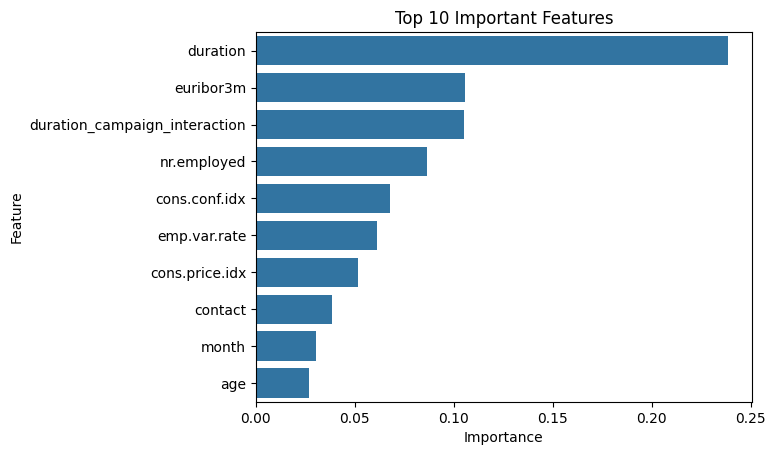

In [ ]:
importances = model.feature_importances_
features = df_encoded.drop('y', axis=1).columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
print(importance_df)

# Plot
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Important Features")
plt.show()


### Save Model and Features

In [ ]:
joblib.dump(X.columns.tolist(), 'feature_columns.joblib')

['feature_columns.joblib']

In [ ]:
joblib.dump(model_forest, "model_forest.joblib")

['model_forest.joblib']

In [ ]:
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

## XGBoosT

### Train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Train XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

In [ ]:
# predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7332
           1       0.94      0.95      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



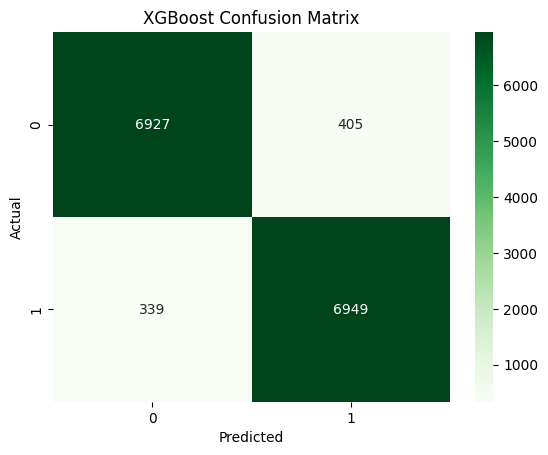

XGBoost ROC-AUC Score: 0.992


In [ ]:
# Classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()

# ROC-AUC
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f"XGBoost ROC-AUC Score: {roc_auc_xgb:.3f}")


### Feature Importance

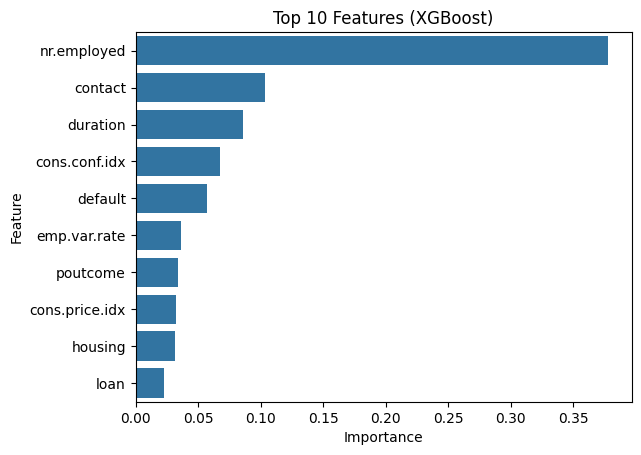

,Feature,Importance
19,nr.employed,0.377659
7,contact,0.103265
10,duration,0.085758
17,cons.conf.idx,0.067657
4,default,0.057120
15,emp.var.rate,0.035988
14,poutcome,0.033570
16,cons.price.idx,0.032523
5,housing,0.031753
6,loan,0.022947


In [ ]:
importances = xgb_model.feature_importances_
features = df_encoded.drop('y', axis=1).columns
importance_df_xgb = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df_xgb = importance_df_xgb.sort_values('Importance', ascending=False)

# Plot
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb.head(10))
plt.title("Top 10 Features (XGBoost)")
plt.show()

# View top features
importance_df_xgb.head(20)


## Hosting

In [ ]:
pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 108.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
# Load model and scaler
model = joblib.load("model_forest.joblib")
scaler = joblib.load("scaler.joblib")
columns = joblib.load("feature_columns.joblib")

def predict(age, duration, campaign, euribor3m, nr_employed, cons_conf_idx, emp_var_rate, cons_price_idx):
    duration_campaign = duration * campaign
    age_bucket = 0 if age < 30 else 1 if age <= 50 else 2

    input_df = pd.DataFrame([np.zeros(len(columns))], columns=columns)
    input_df['age'] = age
    input_df['duration'] = duration
    input_df['campaign'] = campaign
    input_df['euribor3m'] = euribor3m
    input_df['nr.employed'] = nr_employed
    input_df['cons.conf.idx'] = cons_conf_idx
    input_df['emp.var.rate'] = emp_var_rate
    input_df['cons.price.idx'] = cons_price_idx
    input_df['duration_campaign_interaction'] = duration_campaign
    input_df['age_bucket'] = age_bucket

    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)[0]
    prob = model.predict_proba(input_scaled)[0][1]
    return f"Prediction: {'Yes' if prediction == 1 else 'No'} (Prob: {prob:.2%})"


# Gradio UI
iface = gr.Interface(
    fn=predict,
    inputs=[
    gr.Slider(18, 95, label="Age"),
    gr.Slider(0, 2000, label="Call Duration (sec)"),
    gr.Slider(1, 10, label="Number of Contacts"),
    gr.Slider(0.5, 5.0, step=0.01, label="Euribor 3M"),
    gr.Slider(4900, 5300, step=10, label="Number Employed"),
    gr.Slider(-60, 0, step=0.1, label="Consumer Confidence Index"),
    gr.Slider(-3.0, 1.5, step=0.1, label="Employment Variation Rate"),
    gr.Slider(92, 95, step=0.01, label="Consumer Price Index"),
    ],
    outputs="text",
    title="Term Deposit Subscription Predictor"
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0c89537c53c0f94fd7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
